## california data (linear regression data)

In [1]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.1)

## Logistic regrssion 용 데이터

In [3]:
#  해당 코드는 수정하지 마세요
from sklearn.datasets import make_classification


X, y = make_classification(n_features=8, n_informative=5,
                           n_redundant=3, n_clusters_per_class=1, random_state=4, n_samples =1000 )

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state=4)

# 1. coefficient interpretation(logistic regression)

In [5]:
#a. 모든 feature에 대해서 correlation coefficient array 구하기
import numpy as np
import pandas as pd
column_name = ['1','2','3','4','5','6','7','8']
df = pd.DataFrame(X,columns=column_name)
corr = df.corr(method='pearson')
corr

,1,2,3,4,5,6,7,8
1,1.000000,-0.478951,0.436902,0.864159,0.880861,-0.018816,-0.390682,0.215001
2,-0.478951,1.000000,-0.575351,-0.304146,-0.527124,-0.566431,-0.354715,-0.367063
3,0.436902,-0.575351,1.000000,0.403478,0.588714,0.290694,0.572638,0.948551
4,0.864159,-0.304146,0.403478,1.000000,0.670715,-0.029360,-0.212808,0.315153
5,0.880861,-0.527124,0.588714,0.670715,1.000000,-0.229822,-0.183234,0.371171
6,-0.018816,-0.566431,0.290694,-0.029360,-0.229822,1.000000,0.415417,0.242491
7,-0.390682,-0.354715,0.572638,-0.212808,-0.183234,0.415417,1.000000,0.707985
8,0.215001,-0.367063,0.948551,0.315153,0.371171,0.242491,0.707985,1.000000


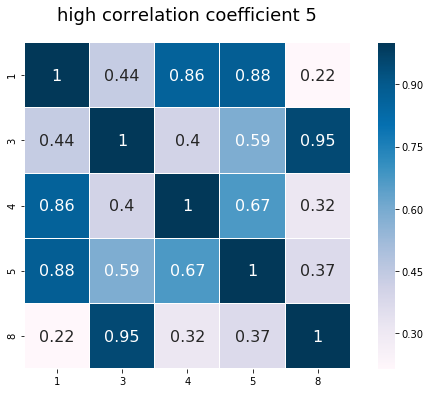

In [7]:
#correlation coefficient가 높은 5개 feature이용
#feature간의 correlation을 heatmap으로 나타내기
import matplotlib.pyplot as plt
import seaborn as sns
heatmap_data = corr.loc[["1", "3", "4", "5", "8"],["1", "3", "4", "5", "8"]]
heatmap_data
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 6))
plt.title("high correlation coefficient 5", y = 1.05, size = 18) 
sns.heatmap(heatmap_data, linewidths = 0.15, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


In [8]:
#b. correlation coefficient array를 바탕으로 multiple logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#모델에서 학습할 feature선택 몇개 위에서 선택한 것들!
columns = ["1", "3", "4", "5", "8"]
data_train = pd.DataFrame(x_train, columns=column_name)
data_test = pd.DataFrame(x_test, columns=column_name)


df = data_train[columns]
x_train_temp = df.values
df2 = data_test[columns]
x_test_temp = df2.values

#x label 의 data들을 정규화한다.
scaler = StandardScaler()
scaler.fit(x_train_temp)
x_train1 = scaler.transform(x_train_temp)
x_test1 = scaler.transform(x_test_temp)

#90%의 데이터를 학습데이터로 사용하여 regression model학습
model = LogisticRegression(multi_class = 'multinomial',solver='newton-cg')
result = model.fit(x_train1,y_train)

#10% 테스트 데이터에 대한 test acc 출력
y_predict = result.predict(x_test1)
print("test data에 대한 test acc : " + str(result.score(x_test1,y_test)))

test data에 대한 test acc : 0.94


# 2. variable selection(linear regression)

forward selection을 수행한 후의 뽑힌 네 개의 feature
['MedInc', 'HouseAge', 'Latitude', 'Longitude']

forward selection 을 수행한 후의 test r^2값
test r_2 : 0.577946009629186
test adj_r_2 : 0.5771260892982082


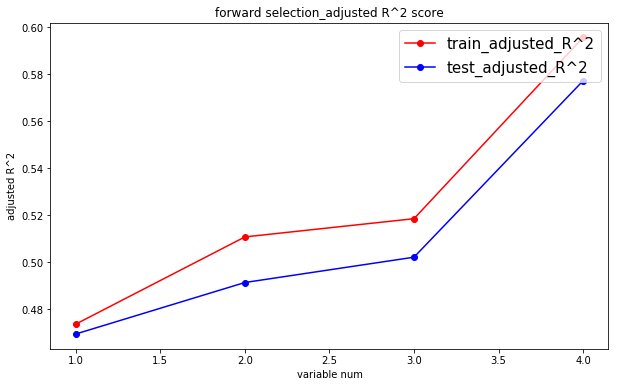

In [9]:
#linear regression model의 variable 선택을 위해
#adjusted R^2을 기반으로 forward selection 수행
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.1,random_state=4)
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

#forward selection 을 위해 data frame으로 각 variable별 데이터 정리
data_train = pd.DataFrame(x_train, columns=california.feature_names)
data_test = pd.DataFrame(x_test, columns=california.feature_names)

#전체 variable 목록
total_fea = data_train.columns.tolist()


#variable 개수 별 adj_r2를 구하기 위함(train, test 그래프 출력을 위해서 정의)
train_adj_r2=[0,0,0,0]
test_adj_r2=[0,0,0,0]
test_r2 = [0,0,0,0]

#r2함수를 이용하여 adj_r2 함수 구현
def adj_r2(y_real,y_pred,p,n) :
    r2 = r2_score(y_real,y_pred)
    temp_adj = 1 - (1-r2)*(n-1)/(n-p-1)
    return temp_adj

temp=0
best_features=[]

#best_features수가 4개가 되면 멈추도록 한다.
while(len(best_features)<4) :
    
    #남아 있는 변수들 중 어떤 것을 선택할지에 대한 리스트 remain_fea
    remain_fea = list(set(total_fea)-set(best_features))
    arr_r2_adj_train=[]
    arr_r2_adj_test = []
    #최종 test r2값 출력을 위함
    arr_test_r2=[]
    
    #값이 추가되었는지에 대한 flag
    flag =0
    
    #(남아 있는 변수들 중 하나씩 선택 +선택된 변수)에 따른 adjusted R^2을 구한다.
    #test r2 adj 또한 그래프 출력을 해야하므로 train data로 학습시킨 것에 대한 test r2 adj를 같이 구함
    for k in remain_fea :      
        df = data_train[best_features+[k]]
        df2 = data_test[best_features+[k]]
        x_train_temp = df.values
        x_test_temp = df2.values
        
        #훈련은 train data로 시킨다.
        reg = LinearRegression()
        reg = reg.fit(x_train_temp,y_train)
        
        #train_temp, test_temp는 각각 데이터에 대한 예측값
        train_temp = reg.predict(x_train_temp)
        test_temp = reg.predict(x_test_temp)
        
        #예측값에 대한 r2 score
        r2_score_train=r2_score(y_train,train_temp)
        r2_score_test=r2_score(y_test,test_temp)  
        
        #출력을 위해 r2 score 저장
        arr_test_r2.append(r2_score_test)
        
        #adj r2 score를 train,test 각각 구하여 임시 배열에 저장
        arr_r2_adj_train.append(adj_r2(y_train,train_temp,len(best_features)+1,len(x_train_temp)))
        arr_r2_adj_test.append(adj_r2(y_test,test_temp,len(best_features)+1,len(x_test_temp)))  
   

    #(남아 있는 변수들 중 하나씩 선택 +선택된 변수)에 따른 adjusted R^2 중 가장 높은 adj_R^2 값을 가진 것을 뽑아낸다.
    max_r2_adj_train = max(arr_r2_adj_train)

    
    #이전에 담았던 max_r2_adj보다 최근에 train_adjusted R^2 값이 좋은 경우, 최근에 추가한 변수를 best feature에 추가하고, 
    #나중에 그래프 출력을 위하여 그 때의 test_adjusted R^2 값을 담는다.
    if(max_r2_adj_train>temp):
        temp=max_r2_adj_train
        #train data에서 adjusted r2값이 최대인 feature가 뽑히게 된다. 
        best_features.append(remain_fea[arr_r2_adj_train.index(max(arr_r2_adj_train))])
    
        #train data에서 adjusted r2값이 최대인 인덱스의 값에서 test adj_r2 를 저장하기 위함
        max_r2_adj_test= arr_r2_adj_test[arr_r2_adj_train.index(max(arr_r2_adj_train))]
        flag=1
    
    #best_features 값의 개수를 샌다.
    num = len(best_features)   
    
    
    #값이 추가 되었음을 알리는 flag=1
    if flag == 1 :
        #num-1로 인덱스에 들어갈 값을 정의하고 위에서 구한 최적의 max값을 넣는다.
        train_adj_r2[num-1] = max_r2_adj_train
        test_adj_r2[num-1] = max_r2_adj_test
        #train data에서 adjusted r2값이 가장 좋았던 인덱스의 값에서 그 selection 단계에서의 test r2가 된다.
        test_r2[num-1] = arr_test_r2[arr_r2_adj_train.index(max(arr_r2_adj_train))]
        
    #이전 것이 더 좋았던 경우 앞의 것을 선택하게 된다. (이번 과제에서는 변수를 고를때마다 성능이 좋아져서 이 코드로는 안들어온 것 같다.)
    elif flag==0 :
        train_adj_r2[num-1] = train_adj_r2[num-2]
        test_adj_r2[num-1] = test_adj_r2[num-2]
        test_r2[num-1]=test_r2[num-2]
        break
        


            
#변수4개 구하기
print("forward selection을 수행한 후의 뽑힌 네 개의 feature")
print(best_features)

#test R^2 출력
print("\nforward selection 을 수행한 후의 test r^2값")
#마지막 forward selection에서의 값이 forward selection 을 수행한 후의 test^r2값들이다.
print("test r_2 : " + str(test_r2[3]))
print("test adj_r_2 : " + str(test_adj_r2[3]))

#x축은 variable 개수, y축은 test data의 adjusted R^2, train data의 adjusted R^2를 다른색으로 그래프 구별
val_num = [1,2,3,4]
labels = ['train_adjusted_R^2','test_adjusted_R^2']
tempData = {'train_adjusted_R^2':train_adj_r2,'test_adjusted_R^2':test_adj_r2}
fig, ax = plt.subplots(figsize = (10,6) )

colors = ['red','blue']
for i, label in enumerate(labels) :
    ax.plot(val_num,tempData[label], color = colors[i],label = label,marker='o',linestyle='solid')            

plt.legend(loc="upper right", fontsize=15)
plt.xlabel('variable num')
plt.ylabel('adjusted R^2')
plt.legend(loc="upper right", fontsize=15)
plt.title('forward selection_adjusted R^2 score')
plt.show()



# 3. Regularized linear model(lineaer regression)

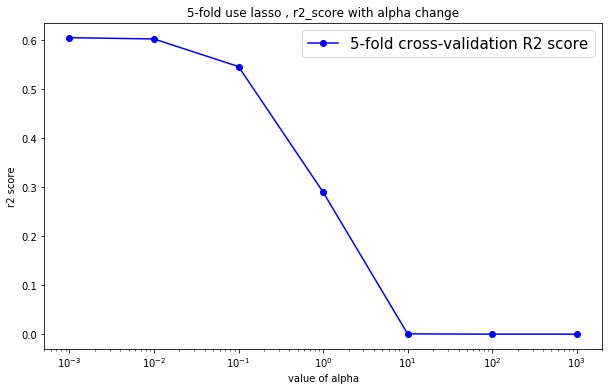


최적화된 model
5-fold로 최적화된 parameter 값 :0.001
5-fold로 최적화된 모델에서의 test R^2값 :0.5904093791941811


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

#Regularization 방법 중 lasso regression이용
#5-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, random_state=100)

#최적 하이퍼 파라미터 탐색
params=[]
valid_tests=[]
for c in np.arange(-3.,4.) :
    reg = linear_model.Lasso(alpha=10.**c, random_state=100)
    scores = cross_val_score(reg, x_train,y_train, cv=kfold,scoring = 'r2')
    params.append(10**c)
    valid_tests.append(np.mean(scores))

#그래프 출력
plt.figure(figsize=(10,6))
plt.plot(params, valid_tests, color = 'blue',marker='o',linestyle='solid',label = "5-fold cross-validation R2 score")
plt.xscale('log')
plt.legend(loc="upper right", fontsize=15)
plt.xlabel('value of alpha')
plt.ylabel('r2 score')
plt.legend(loc="upper right", fontsize=15)
plt.title('5-fold use lasso , r2_score with alpha change')
plt.show()

#최종 모델 선택
#validation test성적이 좋았던 곳의 인덱스가 최적화된 parameter의 인덱스가 된다.
index = valid_tests.index(max(valid_tests))
best_param=params[index]

#모델 훈련
reg = linear_model.Lasso(alpha=best_param, random_state=100)
reg = reg.fit(x_train,y_train)

#최종 모델의 test R^2 출력
from sklearn.metrics import r2_score
predict_value = reg.predict(x_test)
r2_score_val=r2_score(y_test,predict_value)
print('\n최적화된 model')
print('5-fold로 최적화된 parameter 값 :'+ str(best_param))
print('5-fold로 최적화된 모델에서의 test R^2값 :'+ str(r2_score_val))